**Table of contents**<a id='toc0_'></a>    
- [数据操作](#toc1_)    
  - [数据类型](#toc1_1_)    
    - [查看数据类型：](#toc1_1_1_)    
  - [不同维度的tensor](#toc1_2_)    
    - [0维Tensor](#toc1_2_1_)    
    - [1维Tensor](#toc1_2_2_)    
    - [2维Tensor](#toc1_2_3_)    
  - [创建张量](#toc1_3_)    
    - [从numpy导入](#toc1_3_1_)    
    - [0或1初始化](#toc1_3_2_)    
    - [复制形状初始化](#toc1_3_3_)    
  - [维度变换](#toc1_4_)    
    - [挤压与解压](#toc1_4_1_)    
    - [扩展与重复](#toc1_4_2_)    
    - [转置交换](#toc1_4_3_)    
    - [连接、拆分](#toc1_4_4_)    
  - [运算](#toc1_5_)    
    - [常见的标准算术运算符](#toc1_5_1_)    
    - [其他矩阵乘法](#toc1_5_2_)    
  - [广播机制](#toc1_6_)    
  - [统计属性](#toc1_7_)    
  - [索引和切片](#toc1_8_)    
  - [节省内存](#toc1_9_)    
  - [转换为其他 Python 对象](#toc1_10_)    
  - [小结](#toc1_11_)    
  - [练习](#toc1_12_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[数据操作](#toc0_)
:label:`sec_ndarray`

为了能够完成各种操作，我们需要某种方法来存储和操作数据。一般来说，我们需要做两件重要的事情：（1）获取数据；（2）在将数据读入计算机后对其进行处理。如果没有某种方法来存储数据，那么获取数据是没有意义的。我们先尝试一下合成数据。首先，我们介绍$n$维数组，也称为*张量*（tensor）。

使用过Python中使用最广泛的科学计算包NumPy的读者会对本部分很熟悉。无论使用哪个深度学习框架，它的*张量类*（在MXNet中为`ndarray`，在 PyTorch 和TensorFlow中为`Tensor`）都与Numpy的`ndarray`类似，但又比Numpy的`ndarray`多一些重要功能：首先，GPU 很好地支持加速计算，而NumPy仅支持CPU计算；其次，张量类支持自动微分。这些功能使得张量类更适合深度学习。如果没有特殊说明，本书中所说的张量均指的是张量类的实例。


## <a id='toc1_1_'></a>[数据类型](#toc0_)

本节的目标是帮助读者了解并运行一些在阅读本书的过程中会用到的基本数值计算工具。如果你很难理解一些数学概念或库函数，请不要担心。后面的章节将通过一些实际的例子来回顾这些内容。如果你已经有了一些背景知识，想要深入学习数学内容，可以跳过本节。


**torch中的数据类型：**

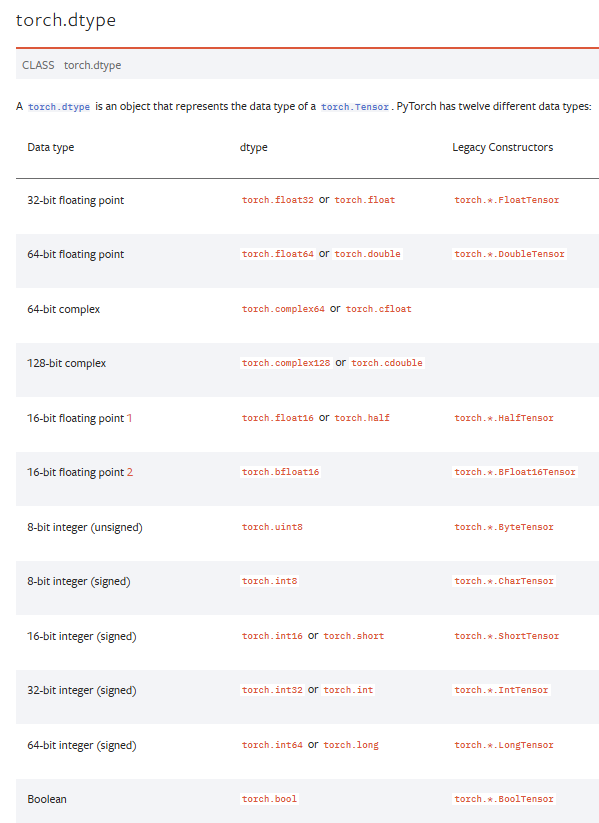

https://pytorch.org/docs/stable/tensor_attributes.html


没有字符型处理能力，一般使用one-hot编码或embending：
Word2vec 和 GloVe 都是用于生成词嵌入（word embeddings）的工具，它们可以将单词映射到高维空间的向量，这些向量能够捕捉单词的语义和上下文信息。

(**首先，我们导入 `torch`。请注意，虽然它被称为PyTorch，但我们应该导入 `torch` 而不是 `pytorch`。**)


In [90]:
import torch
import numpy as np

[**张量表示由一个数值组成的数组，这个数组可能有多个维度**]。具有一个轴的张量对应数学上的*向量*（vector）。具有两个轴的张量对应数学上的 *矩阵*（matrix）。具有两个轴以上的张量没有特殊的数学名称。

首先，可以使用`arange`创建一个行向量`x`。这个行向量包含从0开始的前12个整数，它们被默认创建为浮点数。张量中的每个值都称为张量的*元素*（element）。例如，张量`x`中有12个元素。除非额外指定，否则新的张量将存储在内存中，并采用基于CPU的计算。


In [91]:
x = torch.arange(12)
## help(torch.arange) 查看函数API
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

可以在这里查看torch支持的数据类型,[torch.doc](https://pytorch.org/docs/stable/tensors.html)

### <a id='toc1_1_1_'></a>[查看数据类型：](#toc0_)

In [92]:
x.type()

'torch.LongTensor'

In [93]:
type(x) #不推荐

torch.Tensor

In [94]:
isinstance(x,torch.LongTensor)

True

In [95]:
isinstance(x,torch.cuda.LongTensor)

False

In [96]:
x=x.cuda(0)
isinstance(x,torch.cuda.LongTensor)

True

[**可以通过张量的 `shape` 属性来访问张量的*形状***] (~~和张量中元素的总数~~)（沿每个轴的长度）。


In [97]:
x.shape ##形状

torch.Size([12])

如果只想知道张量中元素的总数，即形状的所有元素乘积，可以检查它的大小（size）。
因为这里在处理的是一个向量，所以它的 `shape` 与它的 `size` 相同。

*number of elements 永远是个标量*


In [98]:
x.numel()##查看元素个数

12

ndim查看多少维度

In [99]:
x.ndim  ##查看维度

1

In [100]:
x.dim()##查看维度

1

## <a id='toc1_2_'></a>[不同维度的tensor](#toc0_)

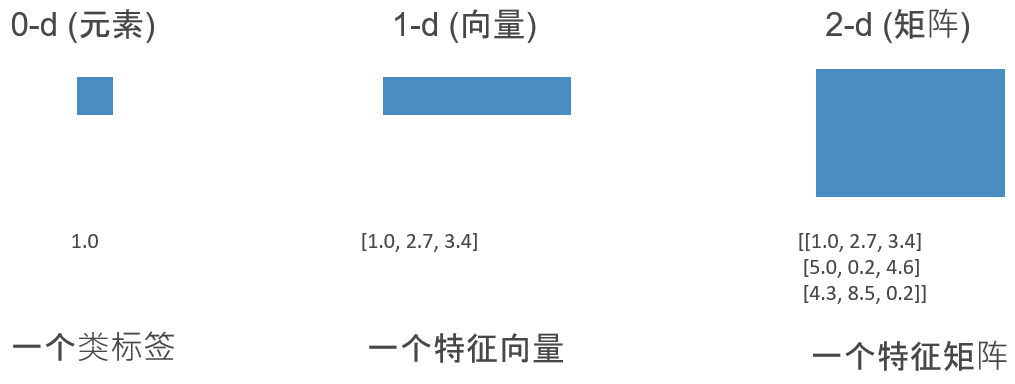


### <a id='toc1_2_1_'></a>[0维Tensor](#toc0_)
**通常0维Tensor用于存储一类标签或损失值`Loss`**

In [101]:
a=3.1
b=torch.tensor(a)
# print(a.ndim,b.ndim)  #'float' object has no attribute 'ndim'
b.ndim

0

In [102]:
b.shape #torch.Size([])

torch.Size([])

In [103]:
# len(b)
len(b.shape)

0

In [104]:
type(b.shape)   #torch.Size类型，torch.Size是PyTorch中用于表示张量尺寸的特殊类，不是元组类型

torch.Size

In [105]:
print(b.size(),b)   #b是一个标量

torch.Size([]) tensor(3.10)


### <a id='toc1_2_2_'></a>[1维Tensor](#toc0_)
**通常用于表示偏置'`bias`'**
在神经网络中，每个神经元都包含一个偏置（bias）参数，这是因为在实际应用中，神经网络的输入数据往往不是标准的，它们可能需要通过一个非线性变换来正确处理。偏置参数的作用是为神经元的输入提供一个额外的偏移量，以便神经元可以学习到数据的真实分布。具体来说，偏置的作用包括：非线性处理,防止过拟合(区分重要特征和噪声),增强泛化能力(更好地处理各种复杂的数据分布,推广到未见过的数据)

In [106]:
#看看0维与1维的区别
x = torch.randn(1)
print(x.size(),x)   #x是个张量

torch.Size([1]) tensor([-0.84])


### <a id='toc1_2_3_'></a>[2维Tensor](#toc0_)

一个特征、如2d灰度图像

In [107]:
# X = x.reshape(3, 4)
# X=torch.rand (3,4)    #均匀分布

X=torch.randn(3,4)  #正态分布
X

tensor([[-0.39, -0.14, -0.88,  0.42],
        [-0.06, -0.87, -0.48,  1.22],
        [ 1.75,  0.28, -1.09,  1.49]])

In [108]:
# 可以使用torch.manual_seed()或torch.cuda.manual_seed()来设置随机数生成器的种子
# 设置种子值
torch.manual_seed(0)
# 生成随机矩阵
X_C = torch.randn(3, 4,device='cpu')
print(X_C)

tensor([[ 1.54, -0.29, -2.18,  0.57],
        [-1.08, -1.40,  0.40,  0.84],
        [-0.72, -0.40, -0.60,  0.18]])


In [109]:
# 确保GPU可用
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(device)

# 设置种子值
torch.cuda.manual_seed(123)
# 生成随机矩阵
X_G = torch.randn(3, 4,device="cuda:0")
print(X_G)

tensor([[ 1.34,  0.21, -1.69,  0.51],
        [-0.35,  0.65,  1.57,  0.35],
        [ 1.13,  0.01, -0.31,  0.48]], device='cuda:0')


In [110]:
X_G[1]

tensor([-0.35,  0.65,  1.57,  0.35], device='cuda:0')

In [111]:
X_G.size(0)

3

In [112]:
X_G.shape[-1]

4

- 2维度通常用于存储输入数据，dim 0 存储索引编号，dim 1存储图像数据。如手写数字的28*28图像以batch_size=16输入时(每次输入16张图像一起训练)，dimension=（16，784）
- 3维常用RNN中word2vec，如（10,20,516），表示每句话10个单词，20句话一起训练，特征数量516
- 4维常用场景如CNN处理图像[b,c,h,w],如（8，3,512,512）（八张图片，RGB三通道，高，宽）

## <a id='toc1_3_'></a>[创建张量](#toc0_)

### <a id='toc1_3_1_'></a>[从numpy导入](#toc0_)



**预处理通常以numpy新式进行，以兼容许多其他科学计算库和工具（如scikit-learn、Pandas、Matplotlib等），当需要用显卡时转为torch.tensor形式进行运算**


In [113]:
a=np.array([[1,2,3],[3,2,1]])
b=np.random.rand(2,3)
a

array([[1, 2, 3],
       [3, 2, 1]])

In [114]:
b

array([[0.90364913, 0.45058994, 0.67134359],
       [0.50986748, 0.44808128, 0.66363784]])

- from_numpy共享cup与gpu内存，而as_tensor则不是。

In [115]:
torch.from_numpy(a)

tensor([[1, 2, 3],
        [3, 2, 1]])

In [116]:
torch.as_tensor(a)

tensor([[1, 2, 3],
        [3, 2, 1]])

In [117]:
torch.tensor(b)

tensor([[0.90, 0.45, 0.67],
        [0.51, 0.45, 0.66]], dtype=torch.float64)

### <a id='toc1_3_2_'></a>[0或1初始化](#toc0_)


有时，我们希望[**使用全0、全1、其他常量或者从特定分布中随机采样的数字**]来初始化矩阵。我们可以创建一个形状为 (2, 3, 4) 的张量，其中所有元素都设置为0。代码如下：

In [118]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

同样，我们可以创建一个形状为`(2,3,4)`的张量，其中所有元素都设置为1。代码如下：


In [119]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

**初始化0,1以外的值**

In [120]:
torch.full((2,3,4),7)

tensor([[[7, 7, 7, 7],
         [7, 7, 7, 7],
         [7, 7, 7, 7]],

        [[7, 7, 7, 7],
         [7, 7, 7, 7],
         [7, 7, 7, 7]]])

### <a id='toc1_3_3_'></a>[复制形状初始化](#toc0_)

In [121]:
x=torch.as_tensor(a)
torch.ones_like(x), torch.zeros_like(x)

(tensor([[1, 1, 1],
         [1, 1, 1]]),
 tensor([[0, 0, 0],
         [0, 0, 0]]))

In [122]:
torch.rand_like(x,dtype=torch.float64)

tensor([[0.36, 0.62, 0.48],
        [0.44, 0.41, 0.21]], dtype=torch.float64)

有时我们想通过从某个特定的概率分布中随机采样来得到张量中每个元素的值。例如，当我们构造数组来作为神经网络中的参数时，我们通常会随机初始化参数的值。以下代码创建一个形状为 (3, 4) 的张量。其中的每个元素都从均值为0、标准差为1的标准高斯（正态）分布中随机采样。


In [123]:
torch.randn(3, 4)

tensor([[-0.89, -1.51,  0.37,  1.46],
        [ 0.94,  0.77,  0.19,  1.26],
        [-1.29, -0.79, -0.02, -0.72]])

我们还可以[**通过提供包含数值的 Python 列表（或嵌套列表）来为所需张量中的每个元素赋予确定值**]。在这里，最外层的列表对应于轴 0，内层的列表对应于轴 1。


In [124]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

## <a id='toc1_4_'></a>[维度变换](#toc0_)


|API|功能描述|
|-|--|
|view（视图、内存映射）|变换维度。当你确定张量的形状可以改变而不需要复制数据时，使用 view()，因为它更高效|
|reshape|变换维度。当你不确定形状是否兼容，或者需要在改变形状时自动处理数据复制的情况，使用 reshape()，因为它更灵活|
|squeeze||
|unsqueeze||
|expand||
|repeat||


In [125]:
x=torch.randn(4,4)
y = x.view(16)
print(x,'\n',y)

tensor([[ 0.59,  1.54,  0.51, -0.59],
        [-0.57,  0.92,  1.11,  1.29],
        [-1.50, -0.19,  0.45,  1.33],
        [-1.63, -0.55, -0.48, -0.50]]) 
 tensor([ 0.59,  1.54,  0.51, -0.59, -0.57,  0.92,  1.11,  1.29, -1.50, -0.19,
         0.45,  1.33, -1.63, -0.55, -0.48, -0.50])


- view与reshap创建视图，不改变原始内存：

In [126]:
a = torch.randn(4, 1, 28, 28)
a.size()


torch.Size([4, 1, 28, 28])

In [127]:
b=a.transpose(0,2)  #交换维度1，2,由于存在1维，实际上并没有改变数据的顺序
b.size()


torch.Size([28, 1, 4, 28])

In [128]:
c = a.reshape(28, 1, 4, 28)
c.size()
torch.equal(b, c)   #比较两个张量是否完全相同

False

- 改变步长:读取步长是读取原始内存的顺序，而非视图,reshape在步长不一致的时候将复制一份数据

In [129]:
a = torch.arange(9).view(3,3)
a,a.stride()

(tensor([[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]),
 (3, 1))

In [130]:
b=a.T
b,b.stride()

(tensor([[0, 3, 6],
         [1, 4, 7],
         [2, 5, 8]]),
 (1, 3))

In [131]:
'''
view size is not compatible with input tensor's size and stride 
(at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.
'''

# b.view(9) 

"\nview size is not compatible with input tensor's size and stride \n(at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.\n"

In [132]:
c=b.reshape(9)
c.stride()

(1,)

- 使用-1取代维度：

In [133]:
a = torch.rand(2,3)
b= a.view(-1,2)
c = a.reshape(-1,) 
b.size(),c.size()

(torch.Size([3, 2]), torch.Size([6]))

### <a id='toc1_4_1_'></a>[挤压与解压](#toc0_)

|API|功能|
|--|--|
|squeeze|压缩大小为1的维度|
|unsqueeze|添加一个维度|

In [134]:
a=torch.arange(6)
a

tensor([0, 1, 2, 3, 4, 5])

In [135]:
b=a.view(1,6,1,1)
c=a.unsqueeze(0).unsqueeze(-1).unsqueeze(-1)
torch.equal(b,c)

True

In [136]:
b.squeeze().size(), b.squeeze(0).squeeze(1).size(), b.squeeze(1).size()


(torch.Size([6]), torch.Size([6, 1]), torch.Size([1, 6, 1, 1]))

### <a id='toc1_4_2_'></a>[扩展与重复](#toc0_)

|API|功能|
|--|--|
|expend|扩展张量不会分配新内存，而只会创建一个 现有 Tensor 上的新视图|
|repeat|沿指定维度重复张量,此函数复制张量的数据占用额外内存|

In [137]:
x=torch.rand(2,3)
x

tensor([[0.79, 0.76, 0.23],
        [0.84, 0.84, 0.57]])

In [138]:
x.repeat(2,1).shape   #第一个维度复制2次，第二维复制1次

torch.Size([4, 3])

In [139]:
x.repeat(1,2,1).shape   ,x.repeat(2,1,1).shape #写多了的话会添加0维度 ,2代表多出两个空的维度

(torch.Size([1, 4, 3]), torch.Size([2, 2, 3]))

In [140]:
x.expand(-1,-1),x.expand(2,3)   #参数为想扩展到多少维度，-1表示改维度保持不变，但只能扩展原始大小为1的维度

(tensor([[0.79, 0.76, 0.23],
         [0.84, 0.84, 0.57]]),
 tensor([[0.79, 0.76, 0.23],
         [0.84, 0.84, 0.57]]))

In [141]:
# 只能扩展原始大小为1的维度，将一张手写数字图像复制3次，并转换为3通道
x=torch.rand(1,1,28,28)
x.expand(4,3,-1,-1).shape   

torch.Size([4, 3, 28, 28])

### <a id='toc1_4_3_'></a>[转置交换](#toc0_)

|API|功能|
|--|--|
|t()|转置是一个方法支持2D,T是一个属性，支持多维|
|transpose|维度交换|
|permute|重新排列维度|

In [142]:
x=torch.arange(12).reshape(2,2,3)
x,x.T,x.T.shape

(tensor([[[ 0,  1,  2],
          [ 3,  4,  5]],
 
         [[ 6,  7,  8],
          [ 9, 10, 11]]]),
 tensor([[[ 0,  6],
          [ 3,  9]],
 
         [[ 1,  7],
          [ 4, 10]],
 
         [[ 2,  8],
          [ 5, 11]]]),
 torch.Size([3, 2, 2]))

In [143]:
x=torch.arange(6).reshape(2,3)  #可以看到reshape破坏了维度信息
x,x.reshape(3,2),x.t,x.transpose(0,1),x.permute(1,0)

(tensor([[0, 1, 2],
         [3, 4, 5]]),
 tensor([[0, 1],
         [2, 3],
         [4, 5]]),
 <function Tensor.t>,
 tensor([[0, 3],
         [1, 4],
         [2, 5]]),
 tensor([[0, 3],
         [1, 4],
         [2, 5]]))

In [144]:
x=torch.rand(1,2,3,4)
# x.t()
x.transpose(0,2).shape,x.permute(1,0,3,2).shape


(torch.Size([3, 2, 1, 4]), torch.Size([2, 1, 4, 3]))

### <a id='toc1_4_4_'></a>[连接、拆分](#toc0_)

|API |功能|
|--|--|
|cat|‘concatenate’的缩写连接，别名concat、concatnate。张量的大小必须匹配,除了被连接那一个维度|
|stack|堆叠，所有维度必须一致，会创建一个新的维度|
|split|拆分成块‘chunk’，参数是每个块的大小|
|chunk|拆分，参数是一个分成多少分|

In [145]:
import torch

x=torch.rand(2,3,4)
y=torch.rand(3,3,4)
#第一个参数可以是元组也可以是列表
torch.cat((x,y),dim=0).shape  
torch.cat([x,y],dim=0).shape


torch.Size([5, 3, 4])

In [146]:
try:
    torch.cat([x,y],dim=1).shape     #Sizes of tensors must match except in dimension 1.张量的大小必须匹配，维度1除外
except Exception as err:
    print(err)

Sizes of tensors must match except in dimension 1. Expected size 2 but got size 3 for tensor number 1 in the list.


In [147]:
# torch.stack((x,y),0).shape  #stack expects each tensor to be equal size

x=torch.rand(2,3)
y=torch.rand(2,3)
torch.stack((x,y),0).shape
#如果两张表格，使用stack，可以增加一个维度，将两张表格合并成一个三维张量，保留分组信息

torch.Size([2, 2, 3])

In [148]:
a = torch.arange(10).reshape(5,2)
a.split(2)  #将a按行分割成2个元素的子张量

(tensor([[0, 1],
         [2, 3]]),
 tensor([[4, 5],
         [6, 7]]),
 tensor([[8, 9]]))

In [149]:
a.split(1,dim=1)    #将a按列分割成1个元素的子张量

(tensor([[0],
         [2],
         [4],
         [6],
         [8]]),
 tensor([[1],
         [3],
         [5],
         [7],
         [9]]))

In [150]:
a,a.chunk(3)  #将a按行分割成3个张量

(tensor([[0, 1],
         [2, 3],
         [4, 5],
         [6, 7],
         [8, 9]]),
 (tensor([[0, 1],
          [2, 3]]),
  tensor([[4, 5],
          [6, 7]]),
  tensor([[8, 9]])))

In [151]:
a.chunk(3,1)    #在1维，将a按列分割成3个张量，不够分。

(tensor([[0],
         [2],
         [4],
         [6],
         [8]]),
 tensor([[1],
         [3],
         [5],
         [7],
         [9]]))

## <a id='toc1_5_'></a>[矩阵运算](#toc0_)
### <a id='toc1_5_1_'></a>[常见的标准算术运算符](#toc0_)

这本书不是关于软件工程的。我们的兴趣不仅仅限于从数组读取和写入数据。我们想在这些数组上执行数学运算。一些最简单且最有用的操作是 *按元素*（elementwise） 操作。它们将标准标量运算符应用于数组的每个元素。对于将两个数组作为输入的函数，按元素运算将二元运算符应用于两个数组中的每对位置对应的元素。我们可以基于任何从标量到标量的函数来创建按元素函数。

在数学表示法中，我们将通过符号 $f: \mathbb{R} \rightarrow \mathbb{R}$ 来表示 *一元* 标量运算符（只接收一个输入）。这意味着该函数从任何实数（$\mathbb{R}$）映射到另一个实数。同样，我们通过符号 $f: \mathbb{R}, \mathbb{R} \rightarrow \mathbb{R}$ 表示 *二元* 标量运算符，这意味着该函数接收两个输入，并产生一个输出。给定同一形状的任意两个向量$\mathbf{u}$和$\mathbf{v}$ 和二元运算符 $f$，我们可以得到向量$\mathbf{c} = F(\mathbf{u},\mathbf{v})$。具体计算方法是$c_i \gets f(u_i, v_i)$ ，其中 $c_i$、$u_i$ 和 $v_i$ 分别是向量$\mathbf{c}$、$\mathbf{u}$ 和 $\mathbf{v}$中的元素。在这里，我们通过将标量函数升级为按元素向量运算来生成向量值 $F: \mathbb{R}^d, \mathbb{R}^d \rightarrow \mathbb{R}^d$。

对于任意具有相同形状的张量，[**常见的标准算术运算符（`+`、`-`、`*`、`/` 和 `**`）都可以被升级为按元素运算**]。我们可以在同一形状的任意两个张量上调用按元素操作。在下面的例子中，我们使用逗号来表示一个具有5个元素的元组，其中每个元素都是按元素操作的结果。


In [152]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x**y,x.sqrt() # *元素级的乘法,**运算符是求幂运算,sqrt()开平方
#也可以使用add、sub、mul、div、,pow()求幂



(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.50, 1.00, 2.00, 4.00]),
 tensor([ 1.,  4., 16., 64.]),
 tensor([1.00, 1.41, 2.00, 2.83]))

可以(**按按元素方式应用更多的计算**)，包括像求幂这样的一元运算符。


In [153]:
# import numpy as np
# np.set_printoptions(suppress=True,   precision=20,  threshold=10,  linewidth=40)    #设置不用科学计数法显示，保留20位小数，打印阈值为10，每行打印40个字符
#设置pytorch不用科学计数法显示
torch.set_printoptions(precision=2,sci_mode=False) #设置保留2位小数，不使用科学计数法显示
torch.exp(x),x.pow(2)

(tensor([    2.72,     7.39,    54.60,  2980.96]),
 tensor([ 1.,  4., 16., 64.]))

### <a id='toc1_5_2_'></a>[其他矩阵乘法](#toc0_)
|*|元素级的乘法|
|--|--|
|dot|点积两个向量必须是1D,结果为标量 （$\mathbf{x}^\top \mathbf{y} = \sum_{i=1}^{d} x_i y_i$）|
|mm|矩阵乘法（$\sum A_{i j} B_{j k}$）只适用于2d,$A$的$i$行与$B$的$k$列对位相乘后求和，放到结果的$ik$位置|
|matmul或者@|矩阵乘法,常用于线性层来作维度变换，高维度运算时只计算后面两个维度|



In [154]:
w=torch.arange(6).reshape(6)
w,w.dot(w)

(tensor([0, 1, 2, 3, 4, 5]), tensor(55))

In [155]:
x=torch.arange(6).reshape(2,3)
y=torch.arange(6).reshape(3,2)
z=torch.arange(6).reshape(2,3)

x,y,x*z,x@y,x.matmul(y),x.mm(y)

(tensor([[0, 1, 2],
         [3, 4, 5]]),
 tensor([[0, 1],
         [2, 3],
         [4, 5]]),
 tensor([[ 0,  1,  4],
         [ 9, 16, 25]]),
 tensor([[10, 13],
         [28, 40]]),
 tensor([[10, 13],
         [28, 40]]),
 tensor([[10, 13],
         [28, 40]]))

In [156]:
# 高维度运算时只计算后面两个维度
a=torch.rand(1,2,3,4)   
b=torch.rand(1,1,4,5)   #1维度用到了广播机制
(a@b).shape

torch.Size([1, 2, 3, 5])

## <a id='toc1_6_'></a>[广播机制](#toc0_)
:label:`subsec_broadcasting`

在上面的部分中，我们看到了如何在相同形状的两个张量上执行按元素操作。在某些情况下，[**即使形状不同，我们仍然可以通过调用 *广播机制* （broadcasting mechanism） 来执行按元素操作**]。这种机制的工作方式如下：首先，通过适当复制元素来扩展一个或两个数组，以便在转换之后，两个张量具有相同的形状。其次，对生成的数组执行按元素操作。

在大多数情况下，我们将沿着数组中长度为1的轴进行广播，如下例子：


In [157]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

由于 `a` 和 `b` 分别是 $3\times1$ 和 $1\times2$ 矩阵，如果我们让它们相加，它们的形状不匹配。我们将两个矩阵*广播*为一个更大的 $3\times2$ 矩阵，如下所示：矩阵 `a`将复制列，矩阵 `b`将复制行，然后再按元素相加。
$$
\left[\begin{array}{ll}
0 & 0 \\
1 & 1 \\
2 & 2
\end{array}\right]+\left[\begin{array}{ll}
0 & 1 \\
0 & 1 \\
0 & 1
\end{array}\right]
$$

In [158]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

只能扩展大小为1或者为空的维度

In [159]:
#维度不存在也可以广播
a = torch.arange(3).reshape((3, 1, 1))
b = torch.arange(2).reshape((1, 2))
a,b,a+b

(tensor([[[0]],
 
         [[1]],
 
         [[2]]]),
 tensor([[0, 1]]),
 tensor([[[0, 1]],
 
         [[1, 2]],
 
         [[2, 3]]]))

In [160]:
#b的0维度不为1，无法广播为3
# a = torch.arange(3).reshape((3, 1))
# b = torch.arange(2).reshape((2, 2))
# a,b,a+b

## <a id='toc1_7_'></a>[统计属性](#toc0_)
|API|功能|描述|
|--|--|--|
|norm|范数|是泛函分析中的知识，需要掌握L1范数、L2范数、F-范数（弗罗贝尼乌斯范数（Frobenius norm））,2.0以后用Use torch.linalg.vector_norm() when computing vector norms and torch.linalg.matrix_norm()|
|mean|均值|
|sum|和|
|prod|累乘|
|max/argmax|最大值/最大值位置|
|min/argmin|最小值/最小值位置|
|topk|最大或最小值其位置索引|
|kthvalue|最小值位置索引|


**$L_1$ 范数，它表示为向量元素的绝对值之和：**

**$$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|$$**

与 $L_2$ 范数相比，$L_1$ 范数受异常值的影响较小。

欧几里得距离是 $L_2$ 范数 **$L_2$ *范数* 是向量元素平方和的平方根：**

**$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2},$$**

其中，在 $L_2$ 范数中常常省略下标 $2$，也就是说，$\|\mathbf{x}\|$ 等同于 $\|\mathbf{x}\|_2$。在代码中，我们可以按如下方式计算向量的 $L_2$ 范数。

**的 *弗罗贝尼乌斯范数*（Frobenius norm） 是矩阵元素平方和的平方根：**
**$$\|\mathbf{X}\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}.$$**

In [161]:
a = torch.tensor([3.0, -4.0])   #sqrt(3^2+4^2=25)
torch.norm(a)   #要求是浮点数


tensor(5.)

In [162]:
a = torch.arange(6.).reshape(1,2,3) # 支持矩阵计算，
torch.norm(a)   #sqrt(0^2+1^2+2^2+3^2+4^2+5^2)  默认是F范数

tensor(7.42)

In [163]:
a = torch.ones(2,3,4) # 支持矩阵计算，
a,torch.norm(a,p='fro')   #sqrt(24)


(tensor([[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],
 
         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]),
 tensor(4.90))

In [164]:
torch.norm(a,dim=0) #只对一个维度求范数，sqart(1^2+1^2)

tensor([[1.41, 1.41, 1.41, 1.41],
        [1.41, 1.41, 1.41, 1.41],
        [1.41, 1.41, 1.41, 1.41]])

In [165]:
torch.norm(a,p=1,dim=2) #对2维求1范数，对行求和

tensor([[4., 4., 4.],
        [4., 4., 4.]])

In [166]:
torch.norm(a,p=2,dim=2) #对2维求2范数，对行求平方和开根号

tensor([[2., 2., 2.],
        [2., 2., 2.]])

In [167]:
x=torch.rand(2,3)
print(x)
#打印最大值、最大值位置、最小值、最小值位置
print("最大值{}、最大值位置{}、最小值{}、最小值位置{}".format(x.max(),x.argmax(),x.min(),x.argmin()))
# 打印均值、和、累乘、topk
print("均值{}、和{}、累乘{}".format(x.mean(),x.sum(),x.prod()))




tensor([[0.96, 0.04, 0.28],
        [0.93, 0.47, 0.60]])
最大值0.9626361727714539、最大值位置0、最小值0.042794644832611084、最小值位置1
均值0.5469231605529785、和3.281538963317871、累乘0.0030165212228894234


In [168]:
#打印第2小的值
print(x.kthvalue(1,dim=1))


torch.return_types.kthvalue(
values=tensor([0.04, 0.47]),
indices=tensor([1, 1]))


In [169]:
#打印top-2，返回最大的两个值和位置
print(x.topk(2,dim=0,largest=False))    
#打印top-2，返回最小的两个值和位置
print(x.topk(2,dim=0,largest=True))

torch.return_types.topk(
values=tensor([[0.93, 0.04, 0.28],
        [0.96, 0.47, 0.60]]),
indices=tensor([[1, 0, 0],
        [0, 1, 1]]))
torch.return_types.topk(
values=tensor([[0.96, 0.47, 0.60],
        [0.93, 0.04, 0.28]]),
indices=tensor([[0, 1, 1],
        [1, 0, 0]]))


## <a id='toc1_8_'></a>[索引和切片](#toc0_)

就像在任何其他 Python 数组中一样，张量中的元素可以通过索引访问。与任何 Python 数组一样：第一个元素的索引是 0；可以指定范围以包含第一个元素和最后一个之前的元素。与标准 Python 列表一样，我们可以通过使用负索引根据元素到列表尾部的相对位置访问元素。

因此，我们[**可以用 `[-1]` 选择最后一个元素，可以用 `[1:3]` 选择第二个和第三个元素**]，如下所示：


In [170]:
X[-1], X[1:3]

(tensor([ 1.75,  0.28, -1.09,  1.49]),
 tensor([[-0.06, -0.87, -0.48,  1.22],
         [ 1.75,  0.28, -1.09,  1.49]]))

[**除读取外，我们还可以通过指定索引来将元素写入矩阵。**]


In [171]:
X[1, 2] = 9
X

tensor([[-0.39, -0.14, -0.88,  0.42],
        [-0.06, -0.87,  9.00,  1.22],
        [ 1.75,  0.28, -1.09,  1.49]])

如果我们想[**为多个元素赋值相同的值，我们只需要索引所有元素，然后为它们赋值。**]
例如，`[0:2, :]` 访问第1行和第2行，其中 “:” 代表沿轴 1（列）的所有元素。虽然我们讨论的是矩阵的索引，但这也适用于向量和超过2个维度的张量。


In [172]:
X[0:2, :] = 12
X

tensor([[12.00, 12.00, 12.00, 12.00],
        [12.00, 12.00, 12.00, 12.00],
        [ 1.75,  0.28, -1.09,  1.49]])

## <a id='toc1_9_'></a>[节省内存](#toc0_)

[**运行一些操作可能会导致为新结果分配内存**]。例如，如果我们用 `Y = X + Y`，我们将取消引用 `Y` 指向的张量，而是指向新分配的内存处的张量。

在下面的例子中，我们用 Python 的 `id()` 函数演示了这一点，它给我们提供了内存中引用对象的确切地址。运行 `Y = Y + X` 后，我们会发现 `id(Y)` 指向另一个位置。这是因为 Python 首先计算 `Y + X`，为结果分配新的内存，然后使 `Y` 指向内存中的这个新位置。


In [173]:
Y=1.
before = id(Y)
Y = Y + X
id(Y) == before

False

这可能是不可取的，原因有两个：首先，我们不想总是不必要地分配内存。在机器学习中，我们可能有数百兆的参数，并且在一秒内多次更新所有参数。通常情况下，我们希望原地执行这些更新。其次，我们可能通过多个变量指向相同参数。如果我们不原地更新，其他引用仍然会指向旧的内存位置，这样我们的某些代码可能会无意中引用旧的参数。


幸运的是，(**执行原地操作**)非常简单。我们可以使用切片表示法将操作的结果分配给先前分配的数组，例如 `Y[:] = <expression>`。为了说明这一点，我们首先创建一个新的矩阵 `Z`，其形状与另一个 `Y` 相同，使用 `zeros_like` 来分配一个全$0$的块。


In [174]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 140681319688608
id(Z): 140681319688608


[**如果在后续计算中没有重复使用 `X`，我们也可以使用 `X[:] = X + Y` 或 `X += Y` 来减少操作的内存开销。**]


In [175]:
before = id(X)
X += Y
id(X) == before

True

## <a id='toc1_10_'></a>[转换为其他 Python 对象](#toc0_)

[**转换为 NumPy 张量**]很容易，反之也很容易。转换后的结果不共享内存。
这个小的不便实际上是非常重要的：当你在 CPU 或 GPU 上执行操作的时候，如果 Python 的 NumPy 包也希望使用相同的内存块执行其他操作，你不希望停下计算来等它。（cpu开始画图，而GPU继续计算）


In [176]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

要(**将大小为1的张量转换为 Python 标量**)，我们可以调用 `item` 函数或 Python 的内置函数。


In [177]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.50]), 3.5, 3.5, 3)

## <a id='toc1_11_'></a>[小结](#toc0_)

* dim\size\shape\tensor\分别表示什么

* 深度学习存储和操作数据的主要接口是张量（$n$维数组）。它提供了各种功能，包括基本数学运算、广播、索引、切片、内存节省和转换其他 Python 对象。

## <a id='toc1_12_'></a>[练习](#toc0_)

1. 运行本节中的代码。将本节中的条件语句 `X == Y` 更改为 `X < Y` 或 `X > Y`，然后看看你可以得到什么样的张量。
1. 用其他形状（例如三维张量）替换广播机制中按元素操作的两个张量。结果是否与预期相同？


[Discussions](https://discuss.d2l.ai/t/1747)
